<a href="https://colab.research.google.com/github/kingap1234/AI-finanse/blob/UseCase2/UseCase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USECASE 2

Biblioteki

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Wczytywanie danych

In [66]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [67]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Zadanie 1**

1.1 Liczba filmów Sci-Fi

In [68]:
print("Liczba filmów Sci-Fi: ", movies[movies['genres'].str.contains('Sci-Fi')].shape[0])

Liczba filmów Sci-Fi:  980


1.2 Rozkład ocen komedii z 2017

In [69]:
Comedy = movies[movies['genres'].str.contains('Comedy')].loc[lambda x: x['title'].str.contains('2017')]

In [70]:
comedy_ratings = ratings.merge(Comedy, on='movieId')

In [71]:
comedy_ratings["title"].value_counts()[0:10]

title
Kingsman: The Golden Circle (2017)     8
The Lego Batman Movie (2017)           7
The Boss Baby (2017)                   5
The Big Sick (2017)                    4
Lady Bird (2017)                       3
Baywatch (2017)                        3
The Hitman's Bodyguard (2017)          3
Despicable Me 3 (2017)                 2
Rough Night (2017)                     2
Christina P: Mother Inferior (2017)    2
Name: count, dtype: int64

In [72]:
comedy_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,18,176101,3.5,1513110715,Kingsman: The Golden Circle (2017),Action|Adventure|Comedy
1,50,176101,1.0,1514498012,Kingsman: The Golden Circle (2017),Action|Adventure|Comedy
2,111,176101,4.0,1516154835,Kingsman: The Golden Circle (2017),Action|Adventure|Comedy
3,184,176101,3.5,1537109645,Kingsman: The Golden Circle (2017),Action|Adventure|Comedy
4,212,176101,3.0,1527796034,Kingsman: The Golden Circle (2017),Action|Adventure|Comedy


<ipython-input-73-7f5b84aed058>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data = comedy_ratings, palette="viridis")


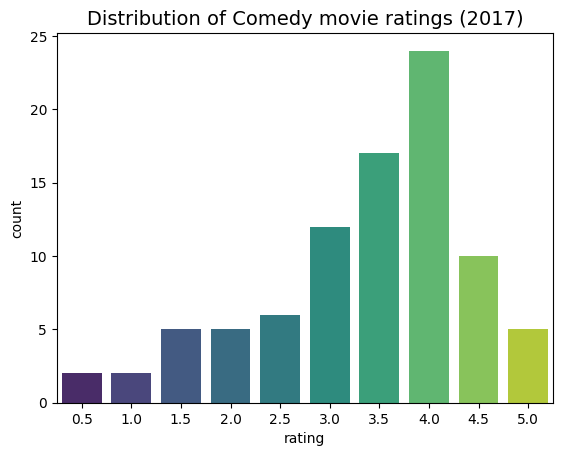

In [73]:
sns.countplot(x="rating", data = comedy_ratings, palette="viridis")
plt.title("Distribution of Comedy movie ratings (2017)", fontsize=14)
plt.show()

1.3  średnia ocen wszystkich filmów akcji oraz  średnią ocen wszystkich filmów akcji


In [74]:
movie_ratings = ratings.merge(movies, on='movieId')
movie_ratings['title'].value_counts()[0:10]

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

In [75]:
Action = movie_ratings[movie_ratings['genres'].str.contains('Action')]

In [76]:
mean_action_ratings = Action.groupby('title')['rating'].mean()
print(f"Mean rating per user: {round(mean_action_ratings.mean(),2)}.")

Mean rating per user: 3.09.


3 filmy akcji najczęściej oceniane

In [77]:
action_ratings_count = Action['movieId'].value_counts()

In [78]:
action_ratings_count.head()

movieId
2571    278
260     251
480     238
110     237
589     224
Name: count, dtype: int64

In [79]:
top_action_movie = movies[movies['movieId'].isin(action_ratings_count.head(3).index)]['title'].tolist()

print("3 most frequently rated action movies:")
for title in top_action_movie:
    print("-", title)

3 most frequently rated action movies:
- Star Wars: Episode IV - A New Hope (1977)
- Jurassic Park (1993)
- Matrix, The (1999)


ZADANIE 2

2.1

In [80]:
!pip install surprise
from surprise.prediction_algorithms import SVD, KNNBaseline
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, GridSearchCV

In [81]:
# Get minimum and maximum rating from the dataset
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()

reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

Model SVD

In [82]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8799  0.8744  0.8690  0.8726  0.8717  0.8735  0.0037  
MAE (testset)     0.6768  0.6710  0.6655  0.6707  0.6724  0.6713  0.0036  
Fit time          2.31    2.27    2.90    3.72    2.94    2.83    0.53    
Test time         0.15    0.25    0.77    0.46    0.67    0.46    0.24    


{'test_rmse': array([0.87992137, 0.87442277, 0.86898312, 0.872568  , 0.87166093]),
 'test_mae': array([0.67682465, 0.67104133, 0.6654606 , 0.6707434 , 0.67237289]),
 'fit_time': (2.3128609657287598,
  2.270380735397339,
  2.9045488834381104,
  3.7164182662963867,
  2.942894697189331),
 'test_time': (0.14906597137451172,
  0.24974489212036133,
  0.7725934982299805,
  0.4640834331512451,
  0.668715238571167)}

Model KNN Baseline

In [83]:
Baseline = KNNBaseline()
cross_validate(Baseline, data, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8805  0.8746  0.8780  0.8693  0.8717  0.8748  0.0041  
MAE (testset)     0.6740  0.6660  0.6710  0.6625  0.6690  0.6685  0.0040  
Fit time          0.61    0.52    1.22    0.94    0.57    0.77    0.27    
Test time         1.88    4.19    3.87    3.93    2.77    3.33    0.87    


{'test_rmse': array([0.88048743, 0.87459331, 0.87803872, 0.86925254, 0.87169483]),
 'test_mae': array([0.67397063, 0.66596823, 0.67097094, 0.66254152, 0.66899348]),
 'fit_time': (0.6069211959838867,
  0.5213468074798584,
  1.2214889526367188,
  0.9398412704467773,
  0.567885160446167),
 'test_time': (1.8797645568847656,
  4.189021587371826,
  3.870225429534912,
  3.9306952953338623,
  2.774322271347046)}

Model SVD oraz model KNNBaseline dają zbilżone wyniki (Mają zbliżone wartość RMSE oraz MAE)

2.2

KNN Baseline w porównaniu do standardowego KNN w procesie rekomendacji bierze pod uwagę ocenę bazową (jest to punkt odniesienia w procesie rekomendacji - średnia ocen filmu). Ocena bazowa jest dodatkowym czynnikiem modelu KNN, służacym do ulepszenia dokładności rekomendacji.

Model KNNBaseline z wyjorzystaniem GridSearch

In [84]:
param_grid = {'k': [2, 3, 4, 5, 6]}

In [85]:
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
gs.fit(data)

In [86]:
print("Best results:")
print(gs.best_score['rmse'])
print(gs.best_score['mae'])
print(gs.best_params['rmse'])
print(gs.best_params['mae'])

Best results:
0.8945268031010862
0.6852007667646567
{'k': 6}
{'k': 6}


In [87]:
KNN_Baseline = KNNBaseline(k=6, sim_options={'name': 'cosine', 'user_based': False})
KNN_Baseline.fit(data.build_full_trainset())

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [88]:
cross_validate(KNN_Baseline, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9413  0.9548  0.9600  0.9592  0.9510  0.9533  0.0068  
MAE (testset)     0.7280  0.7303  0.7393  0.7389  0.7345  0.7342  0.0045  
Fit time          7.84    18.03   9.19    8.14    7.62    10.16   3.97    
Test time         7.52    8.96    6.62    7.75    10.94   8.36    1.49    


Model KNNBaseline z wykorzystaniem GridSearch daje gorsze wyniki niż bez wykorzystania GridSearch (wartości RMSE oraz MAE są wyższe)

Zadanie 3:  rekomendacje po obejrzeniu filmu: Penguins of Madagascar oraz Hobbit: The Desolation of Smaug, The

Model SVD oraz KNNBaseline są zbliżone. Do zadania 3 wybrano model KNNBaseline

In [89]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

In [90]:
def find_similar_movies(movie_id, model, k):

    movie_inner_id = model.trainset.to_inner_iid(movie_id)
    movie_neighbors = model.get_neighbors(movie_inner_id, k)

    neighbors = [model.trainset.to_raw_iid(inner_id) for inner_id in movie_neighbors]

    return neighbors

In [91]:
def find_key_of_value(val, dic):
  found_key = None
  found_keys=[]
  similar_values = []
  for key, value in dic.items():

    if val in value:
      similar_values.append(value)
      found_keys.append(key)

  shortest_string = min(similar_values, key=len)

  index_of_shortest = similar_values.index(shortest_string)
  found_key = found_keys[index_of_shortest]

  return found_key

In [92]:
hobbit_id = movies.loc[movies['title'].str.contains('Hobbit: The Desolation of Smaug'), 'movieId'].iloc[0]
penguins_id = movies.loc[movies['title'].str.contains('Penguins of Madagascar'), 'movieId'].iloc[0]

In [93]:
print(penguins_id)
print(hobbit_id)

117851
106489


In [94]:
def print_recommendations(movie_id, model, k, movie_titles):
    similar_movies = find_similar_movies(movie_id=movie_id, model=model, k=k)
    print("Because you watched:", movie_titles[movie_id])
    print("Recommendations:")
    for movie in similar_movies:
        print(movie_titles[movie])

print_recommendations(penguins_id, KNN_Baseline, 3, movie_titles)
print_recommendations(hobbit_id, KNN_Baseline, 3, movie_titles)

Because you watched: Penguins of Madagascar (2014)
Recommendations:
Ocean's Eleven (2001)
Zoolander (2001)
Truman Show, The (1998)
Because you watched: Hobbit: The Desolation of Smaug, The (2013)
Recommendations:
Be Cool (2005)
Haunting, The (1999)
Christmas Story, A (1983)
